In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import seaborn as sns
from random import choice
import numpy as np
from sklearn.metrics import plot_confusion_matrix
from clean_data import fill_missing_values, norm_column, one_hot_encode_column

In [3]:
train_df, test_df = pd.read_csv("train.csv"), pd.read_csv("test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_df.columns.to_list()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

<AxesSubplot:xlabel='Sex', ylabel='count'>

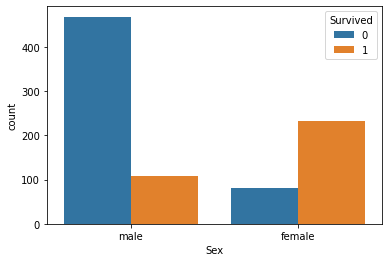

In [5]:
sns.countplot(data=train_df, x="Sex", hue="Survived")

<AxesSubplot:xlabel='Pclass', ylabel='count'>

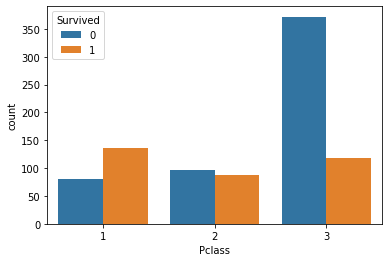

In [6]:
sns.countplot(data=train_df, x="Pclass", hue="Survived")

<AxesSubplot:xlabel='Age', ylabel='Count'>

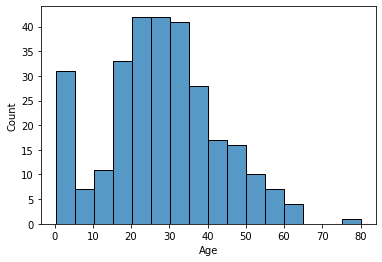

In [7]:
sns.histplot(train_df[train_df["Survived"].dropna() == 1], x="Age")

<AxesSubplot:xlabel='Age', ylabel='Count'>

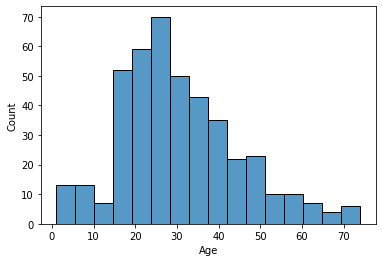

In [8]:
sns.histplot(train_df[train_df["Survived"].dropna() == 0], x="Age")

## Clean data

In [9]:
model_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

In [10]:
filt_train_df = train_df[model_columns]

### fill missing values
Some columns contain NaN values. In order to fill them, we draw a random value
using pythons random.choice() from the whole list of values that are not NaN.
This also preserve the age distribution as it doesn't deduplicate values.

In [11]:
len(filt_train_df[filt_train_df.Age.isnull()])

177

In [12]:
filt_train_df = fill_missing_values(filt_train_df, 'Age')

In [13]:
len(filt_train_df[filt_train_df.Age.isnull()])

0

In [14]:
len(filt_train_df[filt_train_df.Embarked.isnull()])

2

In [15]:
filt_train_df = fill_missing_values(filt_train_df, 'Embarked')

In [16]:
len(filt_train_df[filt_train_df.Embarked.isnull()])

0

### One hot encode
In order to use data types such as categorical ones, we put them into a binary format.
In addition to that, we would also need to assign integer values to non integer values such
as female and male in our Sex column. As we are using pandas get_dummies() function, we don't
need to do that manually.

In [17]:
filt_train_df = one_hot_encode_column(filt_train_df, 'Pclass', 'pclass')

In [18]:
filt_train_df = one_hot_encode_column(filt_train_df, 'Sex', 'sex')

As the age shouldn't be split into 100 different columns, we split it up
into 10 equally sized buckets and one-hot-encode those buckets.

In [19]:
filt_train_df["age_bucket"] = pd.qcut(filt_train_df.Age, 10)

In [20]:
filt_train_df

,sex_female,sex_male,pclass_1,pclass_2,pclass_3,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,age_bucket
0,0,1,0,0,1,3,male,22.0,1,0,7.2500,S,"(19.0, 22.0]"
1,1,0,1,0,0,1,female,38.0,1,0,71.2833,C,"(36.0, 42.0]"
2,1,0,0,0,1,3,female,26.0,0,0,7.9250,S,"(25.0, 28.0]"
3,1,0,1,0,0,1,female,35.0,1,0,53.1000,S,"(32.0, 36.0]"
4,0,1,0,0,1,3,male,35.0,0,0,8.0500,S,"(32.0, 36.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,2,male,27.0,0,0,13.0000,S,"(25.0, 28.0]"
887,1,0,1,0,0,1,female,19.0,0,0,30.0000,S,"(13.0, 19.0]"
888,1,0,0,0,1,3,female,38.0,1,2,23.4500,S,"(36.0, 42.0]"
889,0,1,1,0,0,1,male,26.0,0,0,30.0000,C,"(25.0, 28.0]"


In [21]:
filt_train_df = one_hot_encode_column(filt_train_df, 'age_bucket', 'age_bucket')

### Normalize Fare
We should also normalize number values otherwise larger number values will have a bigger influence
on our model

In [22]:
filt_train_df["fare_norm"] = norm_column(filt_train_df, 'Fare')

### Select Columns For Training

In [23]:
filt_train_df.columns.to_list()

['age_bucket_(0.419, 13.0]',
 'age_bucket_(13.0, 19.0]',
 'age_bucket_(19.0, 22.0]',
 'age_bucket_(22.0, 25.0]',
 'age_bucket_(25.0, 28.0]',
 'age_bucket_(28.0, 32.0]',
 'age_bucket_(32.0, 36.0]',
 'age_bucket_(36.0, 42.0]',
 'age_bucket_(42.0, 50.0]',
 'age_bucket_(50.0, 80.0]',
 'sex_female',
 'sex_male',
 'pclass_1',
 'pclass_2',
 'pclass_3',
 'Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'age_bucket',
 'fare_norm']

In [24]:
columns = [
 'sex_female',
 'sex_male',
 'pclass_1',
 'pclass_2',
 'pclass_3',
 'fare_norm']

In [25]:
age_bin_columns = [ c for c in filt_train_df.columns.to_list() if c.startswith('age') and c != 'age_bucket' ]
columns += age_bin_columns

In [26]:
new_train_df = filt_train_df[columns]

In [27]:
new_train_df

,sex_female,sex_male,pclass_1,pclass_2,pclass_3,fare_norm,"age_bucket_(0.419, 13.0]","age_bucket_(13.0, 19.0]","age_bucket_(19.0, 22.0]","age_bucket_(22.0, 25.0]","age_bucket_(25.0, 28.0]","age_bucket_(28.0, 32.0]","age_bucket_(32.0, 36.0]","age_bucket_(36.0, 42.0]","age_bucket_(42.0, 50.0]","age_bucket_(50.0, 80.0]"
0,0,1,0,0,1,0.014151,0,0,1,0,0,0,0,0,0,0
1,1,0,1,0,0,0.139136,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0.015469,0,0,0,0,1,0,0,0,0,0
3,1,0,1,0,0,0.103644,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0.015713,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,0.025374,0,0,0,0,1,0,0,0,0,0
887,1,0,1,0,0,0.058556,0,1,0,0,0,0,0,0,0,0
888,1,0,0,0,1,0.045771,0,0,0,0,0,0,0,1,0,0
889,0,1,1,0,0,0.058556,0,0,0,0,1,0,0,0,0,0


### Train Model

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [34]:
split = 0.8

In [35]:
labels = pd.DataFrame(train_df.Survived)

In [36]:
x_train, x_vali, y_train, y_vali = train_test_split(new_train_df, labels, test_size=split)

In [37]:
model = RandomForestClassifier()

In [38]:
model = model.fit(x_train, y_train)

<ipython-input-38-03c5cd2ec0ec>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = model.fit(x_train, y_train)


In [39]:
train_acc_log = round(model.score(x_train, y_train) * 100, 2)
print("Prediction accuracy (Training Set):", train_acc_log, "%\n")

Prediction accuracy (Training Set): 99.44 %



In [40]:
test_acc_log = round(model.score(x_vali, y_vali) * 100, 2)
print("Prediction accuracy (Test Set):", test_acc_log, "%\n")

Prediction accuracy (Test Set): 76.02 %



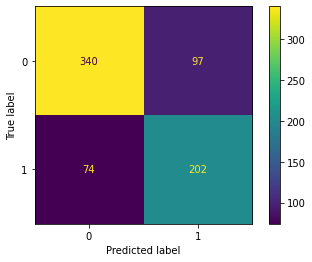

In [41]:
plot_confusion_matrix(model, x_vali, y_vali)  

# Optimisation

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
rf_model = RandomForestClassifier()

In [44]:
param_grid = {"n_estimators": list(range(10, 201))}

In [45]:
grid_rf_class = GridSearchCV(
    estimator=rf_model,
    param_grid= param_grid,
    scoring='f1',
    n_jobs=16,
    cv=5,
    refit=True, 
    return_train_score=True)

In [46]:
grid_rf_class.fit(x_train, y_train)

/home/shrank/.pyenv/versions/3.8.0/envs/ml/lib/python3.8/site-packages/sklearn/model_selection/_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=16,
             param_grid={'n_estimators': [10, 11, 12, 13, 14, 15, 16, 17, 18,
                                          19, 20, 21, 22, 23, 24, 25, 26, 27,
                                          28, 29, 30, 31, 32, 33, 34, 35, 36,
                                          37, 38, 39, ...]},
             return_train_score=True, scoring='f1')

In [47]:
best_est = (grid_rf_class.best_estimator_)

In [48]:
best_est

RandomForestClassifier(n_estimators=152)

In [134]:
test_acc_log = round(best_est.score(x_vali, y_vali) * 100, 2)
print("Prediction accuracy (Test Set):", test_acc_log, "%\n")

Prediction accuracy (Test Set): 79.24 %



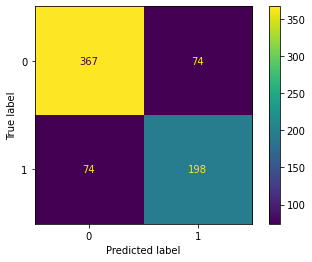

In [136]:
plot_confusion_matrix(best_est, x_vali, y_vali)  